In [88]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import math

Q1.

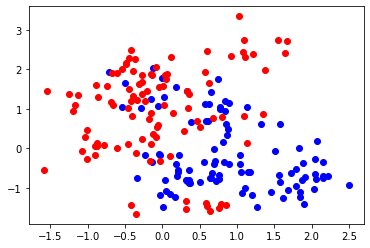

In [103]:
a1 = np.array([1,0])
sd1 = np.array([[1,0],[0,1]])
m = np.random.multivariate_normal(a1, sd1, 10)

a2 = np.array([0,1])
sd2 = np.array([[1,0],[0,1]])
md = np.random.multivariate_normal(a2, sd2, 10)

a = m[0]
sd = np.array([[0.1,0],[0,0.1]])
p1 = np.random.multivariate_normal(a, sd, 10)
for i in range(9):
  a = m[i+1]
  p1 = np.concatenate((p1, np.random.multivariate_normal(a, sd, 10)), axis=0)

a = md[0]
sd = np.array([[0.1,0],[0,0.1]])
n1 = np.random.multivariate_normal(a,sd,10)
for i in range(9):
  a = md[i+1]
  n1 = np.concatenate((n1, np.random.multivariate_normal(a,sd,10)), axis = 0)

plt.figure()
plt.scatter(p1[:,0], p1[:,1], color='b') # +1 are blue
plt.scatter(n1[:,0], n1[:,1], color='r') # -1 are red
plt.show()

In [104]:
X1 = np.concatenate((p1,n1), axis=0)
Y = np.concatenate((np.ones(100), -1*np.ones(100)), axis=0)
temp = X1.shape[0]
X = np.hstack((np.ones(temp).reshape(temp,1), X1))

Q2. Linear Model

The Training Set Error in the Linear Model is 22.5 %

 LINEAR CLASSIFIER PLOT:


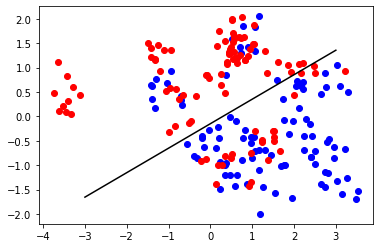

In [91]:
def linearRegression(X_train, Y_train):
  theta = np.linalg.inv(X_train.T@X_train)@X_train.T@Y
  return theta

theta = linearRegression(X,Y)
Y_p = X@theta

for i in range(Y_p.shape[0]):
  if(Y_p[i]>0):
    Y_p[i]=1
  else:
    Y_p[i]=-1

error=0
total = Y_p.shape[0]
for i in range(Y_p.shape[0]):
  if(Y_p[i] != Y[i]):
    error+=1;

e = error/total *100

temp_x = np.array([-3,-2,-1,0,1,2,3])
temp_y = (-theta[1]/theta[2])*temp_x+(-theta[0]/theta[2])

print("The Training Set Error in the Linear Model is", e, "%")

print("\n LINEAR CLASSIFIER PLOT:")
plt.figure()
plt.scatter(p1[:,0], p1[:,1], color='b') # +1 are blue
plt.scatter(n1[:,0], n1[:,1], color='r') # -1 are red
plt.plot(temp_x, temp_y, color = 'black')
plt.show()

Q3. KNN Model  K=15

In [105]:
def dist(x,y):
  d = np.linalg.norm(x-y, ord=2)
  return d
nlst = []

def KNN(x, X_t, Y_t, K):
  lst=[]
  for i in range(X_t.shape[0]):
    lst.append((dist(x, X_t[i]), Y_t[i]))
  
  nlst = sorted(lst, key = lambda x: x[0])
  nlst = nlst[0:K]

  pd=0
  for i in nlst:
    pd+=i[1]

  pd/=K

  if pd>0:
    return 1
  else:
    return -1



Total Training Error in a 15-NN model is 14.499999999999998 %

15-NN Classifier Plot:-


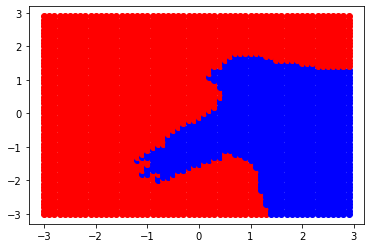

In [106]:
miss = 0
total = X.shape[0]

for i in range(X.shape[0]):
  y_p = KNN(X[i], X, Y, 15)
  if(y_p != Y[i]):
    miss = miss + 1

e = miss/total * 100

print("Total Training Error in a 15-NN model is", e , "%\n")


print("15-NN Classifier Plot:-")  
plt.figure()
i=-3 
step = 0.1
j=-3
step = 0.1
while(i<3):
    j=-3
    while(j<3):
        temp_x = np.array([1,i,j])
        Y_p = KNN(temp_x, X, Y, 15)
        if(Y_p == 1):
            plt.scatter(i, j, color='b')
        else:
            plt.scatter(i, j, color='r')
        j=j+step
    i=i+step
plt.show()

Q4. 1NN Model

Total Training Error in a 1-NN model is 0.0 %

1-NN Classifier Plot:-


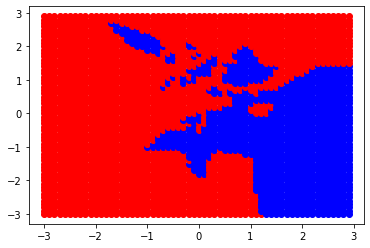

In [107]:
miss = 0
total = X.shape[0]

for i in range(X.shape[0]):
  y_p = KNN(X[i], X, Y, 1)
  if(y_p != Y[i]):
    miss = miss + 1

e = miss/total * 100

print("Total Training Error in a 1-NN model is", e , "%\n")


print("1-NN Classifier Plot:-")  
plt.figure()
i=-3 
step = 0.1
j=-3
step = 0.1
while(i<3):
    j=-3
    while(j<3):
        temp_x = np.array([1,i,j])
        Y_p = KNN(temp_x, X, Y, 1)
        if(Y_p == 1):
            plt.scatter(i, j, color='b')
        else:
            plt.scatter(i, j, color='r')
        j=j+step
    i=i+step
plt.show()

Q5. Testing on a dataset of 10000 vectors

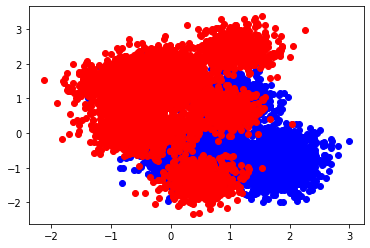

In [108]:
a = m[0]
sd = np.array([[0.1,0],[0,0.1]])
p1t = np.random.multivariate_normal(a, sd, 500)
for i in range(9):
  a = m[i+1]
  p1t = np.concatenate((p1t, np.random.multivariate_normal(a, sd, 500)), axis=0)

a = md[0]
sd = np.array([[0.1,0],[0,0.1]])
n1t = np.random.multivariate_normal(a,sd,500)
for i in range(9):
  a = md[i+1]
  n1t = np.concatenate((n1t, np.random.multivariate_normal(a,sd,500)), axis = 0)

plt.figure()
plt.scatter(p1t[:,0], p1t[:,1], color='b') # +1 are blue
plt.scatter(n1t[:,0], n1t[:,1], color='r') # -1 are red
plt.show()

The Test Set Error in the Linear Model is 22.06 %

 LINEAR CLASSIFIER PLOT:


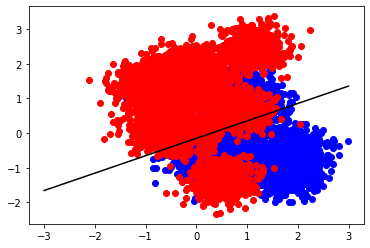

In [109]:
X1t = np.concatenate((p1t,n1t), axis=0)
Yt = np.concatenate((np.ones(5000), -1*np.ones(5000)), axis=0)
temp = X1t.shape[0]
Xt = np.hstack((np.ones(temp).reshape(temp,1), X1t))

Y_pt = Xt@theta

for i in range(Y_pt.shape[0]):
  if(Y_pt[i]>0):
    Y_pt[i]=1
  else:
    Y_pt[i]=-1

error=0
total = Y_pt.shape[0]
for i in range(Y_pt.shape[0]):
  if(Y_pt[i] != Yt[i]):
    error+=1;

e = error/total *100

print("The Test Set Error in the Linear Model is", e, "%")
temp_x = np.array([-3,-2,-1,0,1,2,3])
temp_y = (-theta[1]/theta[2])*temp_x+(-theta[0]/theta[2])
print("\n LINEAR CLASSIFIER PLOT:")
plt.figure()
plt.scatter(p1t[:,0], p1t[:,1], color='b') # +1 are blue
plt.scatter(n1t[:,0], n1t[:,1], color='r') # -1 are red
plt.plot(temp_x, temp_y, color = 'black')
plt.show()

In [110]:
miss = 0
total = Xt.shape[0]

for i in range(Xt.shape[0]):
  Y_p = KNN(Xt[i], X, Y, 15)
  if(Y_p != Yt[i]):
    miss = miss + 1

e = miss/total * 100

print("Total Test Error in a 15-NN model is", e , "%\n")


Total Test Error in a 15-NN model is 15.310000000000002 %



In [111]:
miss = 0
total = Xt.shape[0]
Y_p=0
for i in range(Xt.shape[0]):
  Y_p = KNN(Xt[i], X, Y, 1)
  if(Y_p != Yt[i]):
    miss = miss + 1

e = miss/total * 100

print("Total Test Error in a 1-NN model is", e , "%\n")


Total Test Error in a 1-NN model is 20.97 %

